In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# generate random number for 30 times. 0 means the price goes down and the possibility is 0.45. 1 means the price goes up
# and the possibility is 0.55
pro = np.random.choice([0, 1], size=(30,), p=[0.45, 0.55])
pro

In [79]:
p = 50   # stock price period 0
k = 44   # strike price 
up = 1.1   # growth rate
down = 0.8  # decline rate
rf = 0.023    #risk free rete for 30 periods

In [80]:
#simulate stock price in 30 times
price = []
cp = p
for i in pro:
    if i ==1:
        cp = cp * up
        price.append(cp)
    else:
        cp = cp * down
        price.append(cp)
price

[55.00000000000001,
 60.500000000000014,
 66.55000000000003,
 53.24000000000002,
 58.56400000000003,
 46.85120000000003,
 51.53632000000003,
 41.22905600000003,
 45.35196160000004,
 49.88715776000004,
 54.87587353600005,
 60.36346088960006,
 66.39980697856008,
 73.0397876764161,
 80.3437664440577,
 64.27501315524617,
 51.42001052419694,
 56.56201157661664,
 45.249609261293315,
 49.774570187422654,
 54.752027206164925,
 43.801621764931944,
 48.181783941425145,
 38.54542715314012,
 42.399969868454136,
 33.91997589476331,
 37.311973484239644,
 41.04317083266361,
 45.14748791592998,
 49.66223670752298]

In [81]:
# calculate the payoff of the option
option_payoff = max (price[-1] - k, 0)
option_payoff

5.662236707522979

In [86]:
# define a function to simulate different periods and different times
def option (period = 30, times = 100000):
    payoff = []
    for i in range(1, times+1):
        pro = np.random.choice([0, 1], period, p=[0.45, 0.55])
        price = []
        cp = p
        for i in pro:
            if i == 1:
                cp = cp * up
                price.append(cp)
            else:
                cp = cp * down
                price.append(cp)
        payoff.append(max (price[-1] - k, 0))
    return payoff

In [87]:
# calculate the simulated option price for 100000 times for 30 periods
option_30_100000 = option(period = 30, times = 100000)
avg_payoff = sum(option_30_100000)/len(option_30_100000)
f_price = avg_payoff / np.exp(rf)
f_price

1.4459431087413241

In [88]:
# define a function that returns all the results of the simulations
def option_path(period = 30, times = 100000):
    path = []
    for i in range(1, times+1):
        pro = np.random.choice([0,1],size = (period,), p = [0.45,0.55])
        cp = p
        price1 = [cp]
        for i in pro:
            if i == 1:
                cp = cp * up
                price1.append(cp)
            else:
                cp = cp * down
                price1.append(cp)
        path.append(price1)
    return path

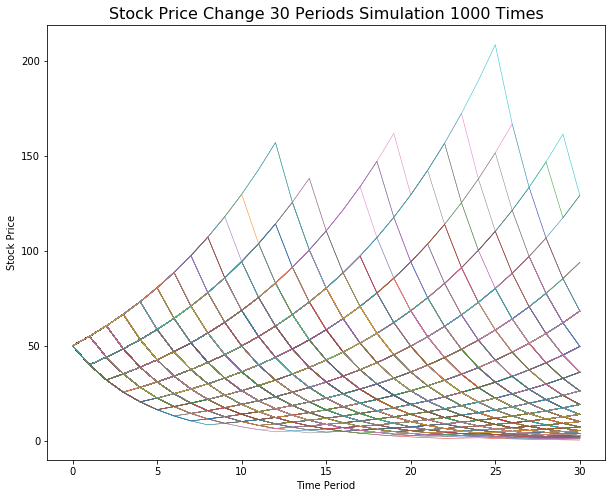

In [108]:
# plot the stock price change path
option_path_plot = option_path(period = 30, times = 1000)
option_path_ts = np.transpose(option_path_plot)

plt.figure(figsize = (10,8))
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.title('Stock Price Change 30 Periods Simulation 1000 Times',fontsize = 16)
plt.plot(option_path_ts, linewidth = 0.5)
plt.show()

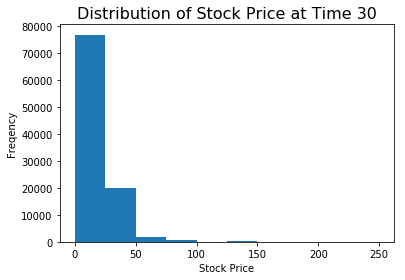

In [112]:
# plot thestock price distribution
end_price = []
for i in option_path(period = 30, times = 100000):
    end_price.append(i[-1])

plt.title('Distribution of Stock Price at Time 30',fontsize = 16)
plt.xlabel('Stock Price')
plt.ylabel('Freqency')
plt.hist(end_price, bins = [0,25,50,75,100,125,150,175,200,225,250])
plt.show()

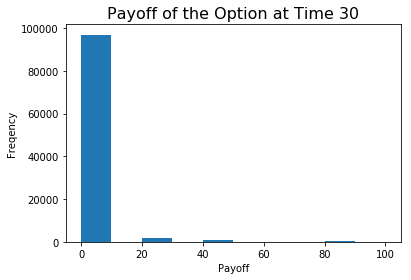

In [117]:
# plot the payoff distribution
plt.title('Payoff of the Option at Time 30',fontsize = 16)
plt.xlabel('Payoff')
plt.ylabel('Freqency')
plt.hist(option_30_100000, bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.show()